To learn more about the dataset and the competition, visit the website: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

# About this notebook

The goal of this notebook is to show that a solution that is both simple and effective is possible when proper data preprocessing and exploration is carried out. Accordingly, the main part of this notebook focuses on the exploratory data analysis, which involves data preprocessing, outlier and missing value handling, feature engineering and feature selection. A linear regression model is fitted and shows a good performance illustrating the stated goal.  

These are some sources that I have found insightful and helped me to create this notebook:


*   [Comprehensive data exploration with Python](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python)
*[A study on Regression applied to the Ames dataset](https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook)
*[Ames housing dataset](https://www.mariopasquato.com/fun-with-data/ames-housing-dataset/)
*[Cracking the Ames Housing Dataset with Linear Regression](https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96)


# Exploratory data analysis (EDA)

Import necessary libraries and data.

In [2507]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# modules from sklearn used in regression analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

# module for Q-Q plot
from scipy import stats

# ignore warnings from seaborn and sklearn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

pd.options.display.max_rows = 100

In [2508]:
df_train = pd.read_csv("https://raw.githubusercontent.com/jpconher/Kaggle/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/data/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/jpconher/Kaggle/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/data/test.csv")

In [2509]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Initial data exploration

In [2510]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1460 observations and 81 variables (including $Id$ and the dependent variable $SalePrice$) in the traning data set.

In [2511]:
df_train.shape

(1460, 81)

Both non-numeric variables (object type) and numeric variables (int64 and float64).

In [2512]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Average sale price 180,921\$. Maximum and minimum sale prices 755,000\$ and 34,900\$, respectively.

In [2513]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The distribution is positively skewed and leptokurtic. Its shape resembles a lognormal distribution.

<Axes: xlabel='SalePrice', ylabel='Count'>

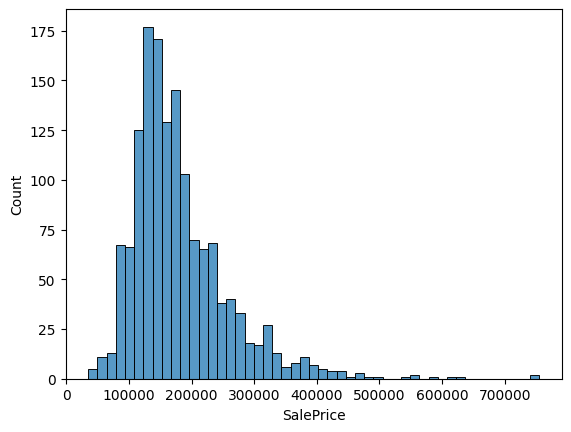

In [2514]:
sns.histplot(df_train['SalePrice'])

In [2515]:
print("Kurtosis:", df_train['SalePrice'].kurtosis(), "; Skewness:", df_train['SalePrice'].skew())

Kurtosis: 6.536281860064529 ; Skewness: 1.8828757597682129


## Outliers

Eliminate some influential outliers in the variables $GrLivArea$ and $LotArea$ from the training data.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

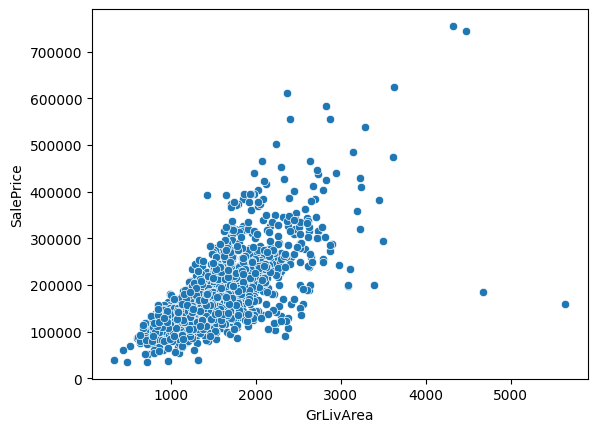

In [2516]:
sns.scatterplot(data = df_train, x = 'GrLivArea', y = 'SalePrice')

<Axes: xlabel='LotArea', ylabel='SalePrice'>

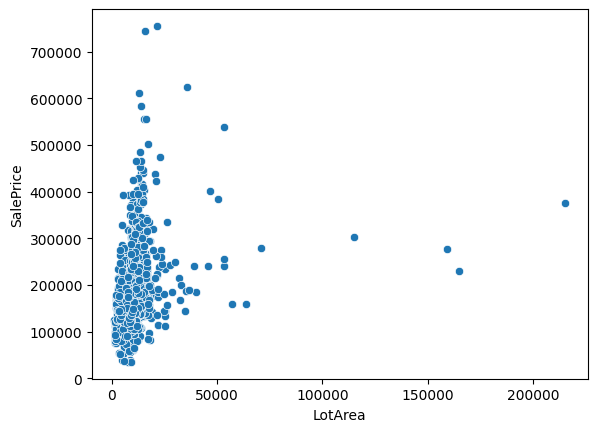

In [2517]:
sns.scatterplot(data = df_train, x = 'LotArea', y = 'SalePrice')

8 observations in total are dropped from the training dataset.

In [2518]:
df_train = df_train[(df_train['GrLivArea'] < 4000) & (df_train['LotArea'] < 100000)]
df_train.shape

(1452, 81)

## Feature engineering

Training and test data sets will be treated jointly in this section.

In [2519]:
df = df_train.append(df_test)
df.shape

(2911, 81)

### Missing data

Some variables have missing values. In most cases, they indicate the lack of a certain amenity (e.g. swimming pool, garage...).

In [2520]:
missing_data = df.isna().sum().sort_values(ascending = False)
missing_data.head(20)

PoolQC          2903
MiscFeature     2808
Alley           2713
Fence           2341
SalePrice       1459
FireplaceQu     1420
LotFrontage      483
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

The missing values in categorical variables can be replaced, in most cases, by a default value indicating the absence of a certain amenity in the house. However this does not apply to the variables $MSZoning$, $Utilities$, $Functional$, $BsmtFullBath$, $Exterior1st$, $Exterior2nd$, $SaleType$, $KitchenQual$ and $Electrical$ as, according to the data description, missing values do not indicate that the house is lacking the amenity. Given the small number of cases, the missing values are replaced with the most common category.

In [2521]:
# missing indicates lack of amenity
df['PoolQC'] = df['PoolQC'].fillna('No_pool')
df['MiscFeature'] = df['MiscFeature'].fillna('No_misc')
df['Alley'] = df['Alley'].fillna('No_alley')
df['Fence'] = df['Fence'].fillna('No_fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_fireplace')
df['GarageFinish'] = df['GarageFinish'].fillna('No_garage')
df['GarageQual'] = df['GarageQual'].fillna('No_garage')
df['GarageCond'] = df['GarageCond'].fillna('No_garage')
df['GarageType'] = df['GarageType'].fillna('No_garage')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No_basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No_basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No_basement')
df['MasVnrType'] = df['MasVnrType'].fillna('No_masvnr')

# missing does not indicate lack of amenity
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

Regarding the numerical variables, the missing values for $LotFrontage$ can be approximated by the square root of $LotArea$ by assuming the lot shape is a square. It can also be assumed that the garage and the house were built around the same time to impute the missing values in $GarageYrBlt$. For the remaining variables, the median value or the most frequent number (if integer) will be imputed.

In [2522]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotArea']**0.5)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

# median/most frequent value imputation
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].mode()[0])
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())

missing_data = df.isna().sum().sort_values(ascending = False)
missing_data.head(5)

SalePrice      1459
CentralAir        0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
dtype: int64

### Categorical variables

Two categorical variables $MSSubClass$ and $MoSold$ were encoded as numerical variables. They should be encoded as categorical variables since they are not ordinal.

In [2523]:
df = df.replace({"MSSubClass":{20:"SC20", 30:"SC30", 40:"SC40",
                               45:"SC45", 50:"SC50", 60:"SC60",
                               70:"SC70", 75:"SC75", 80:"SC80",
                               85:"SC85", 90:"SC90", 120:"SC120",
                               150:"SC150", 160:"SC160",
                               180:"SC180", 190:"SC190"},
                 "MoSold":{1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",
                           5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
                           9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}})

There is only one observation 'Po' (poor) in $HeatingQC$. It can be added to the label 'Fa' (fair). Additionally, the effect of heating quality on the sale price depends on the season. When it is cold, the quality of the heating matters the most! This is to be expected considering that the data set comprises of houses located in Ames, Iowa, where the average temperature in winter is well below freezing. A dummy variable $Winter$ is created to describe whether the house was sold in winter or not. It is a good candidate for an interaction term with $HeatingQC$.

In [2524]:
df['HeatingQC'] = df['HeatingQC'].replace('Po', 'Fa')
def season_winter(row):
  if (row['MoSold'] in ['Dec', 'Jan', 'Feb']):
    return 1
  else:
    return 0
df['Winter'] = df.apply(lambda row: season_winter(row), axis = 1).astype('int8')

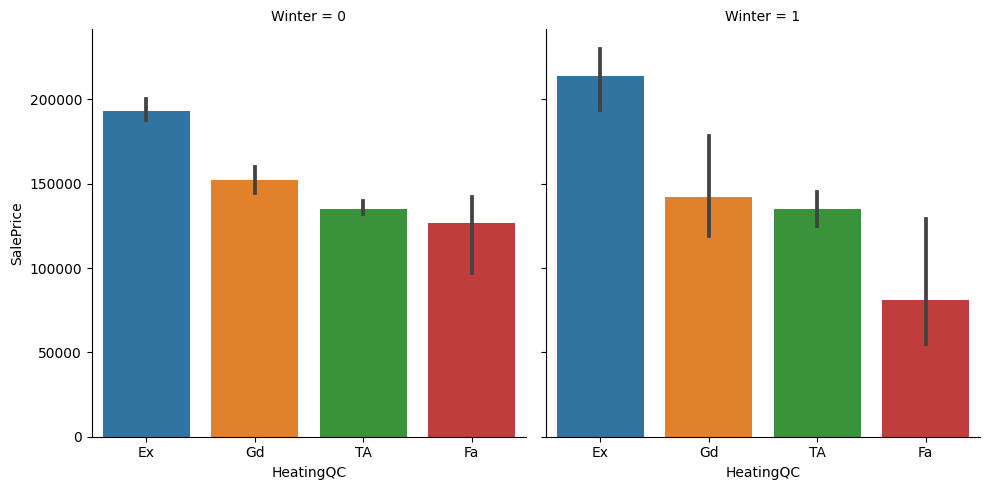

In [2525]:
sns.catplot(df, x = 'HeatingQC', y = 'SalePrice', col = 'Winter', kind = 'bar', estimator = 'median')

The variables $OverallQual$ and $OverallCond$ are both ordinal variables. Thus, it makes sense to apply an ordinal encoding and treat the variables as if they were numerical variables. However, while in the first case there is a clear positive relationship with $SalePrice$ the relationship in the case of $OverallCond$ is not that clear. Instead, it seems as if houses with poor conditions ($OverallQual < 5$) have lower $SalePrice$ than houses with fair or good conditions ($OverallQual \ge 5$) while the exact degree within each group does not affect the price. A dummy can capture this.

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

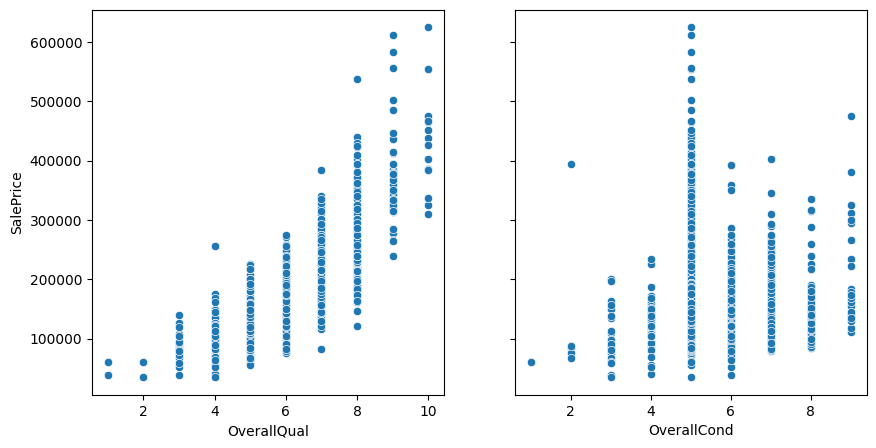

In [2526]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey = True)
sns.scatterplot(df, x='OverallQual', y='SalePrice', ax = axes[0])
sns.scatterplot(df, x='OverallCond', y='SalePrice', ax = axes[1])

In [2527]:
df_train.groupby('OverallCond')['SalePrice'].agg(['count', 'mean'])

,count,mean
OverallCond,,
1,1,61000.000000
2,5,141986.400000
3,25,101929.400000
4,57,120438.438596
5,816,202226.552696
6,250,151257.484000
7,204,157562.867647
8,72,155651.736111
9,22,216004.545455


In [2528]:
def dummy_condition(row):
  if row['OverallCond'] < 5:
    return 1
  else:
    return 0
df['Poor_condition'] = df.apply(lambda row: dummy_condition(row), axis = 1).astype('int8')

The ordinal categorical variables $KitchenQual$, $HeatingQC$, $ExterQual$ and $ExterCond$ are encoded as numerical variables.

In [2529]:
def numerical_encoding(row, col_name):
  if row[col_name] == 'Ex':
    return 5
  elif row[col_name] == 'Gd':
    return 4
  elif row[col_name] == 'TA':
    return 3
  elif row[col_name] == 'Fa':
    return 2
  elif row[col_name] == 'Po':
    return 1

df['HeatingQC'] = df.apply(lambda row: numerical_encoding(row, 'HeatingQC'), axis = 1).astype('int8')
df['KitchenQual'] = df.apply(lambda row: numerical_encoding(row, 'KitchenQual'), axis = 1).astype('int8')
df['ExterQual'] = df.apply(lambda row: numerical_encoding(row, 'ExterQual'), axis = 1).astype('int8')
df['ExterCond'] = df.apply(lambda row: numerical_encoding(row, 'ExterCond'), axis = 1).astype('int8')

When fitting the model, it becomes problematic to deal with categorical variables that have numerous levels but insufficient observations for certain levels. $MSSubClass$ is one example. Since $HouseStyle$ and $YearBuilt$ contain most of the information in $MSSubClass$, it can be excluded from our model without losing much information. Another example is $Neighborhood$. It has 25 levels some of them with very few observations (e.g. Blueste with just 2 observations). One possibility is to group the neighbourhoods by their desirability. This can be done by assuming that houses in desirable locations will be made of better quality material and will be kept in better conditions. Given this assumption, a composite variable ($Location$) that describes the desirability of a neighborhood can be created from $OverallQual$, $OverallCond$, $ExterQual$, $ExterCond$, $KitchenQual$.



In [2530]:
df['Condition'] = (df['OverallQual'] + df['OverallCond'] + df['ExterQual'] + \
                  df['ExterCond'] + df['KitchenQual'])/5

Location = pd.qcut(df.groupby('Neighborhood')['Condition'].agg('mean'), 4, labels = ['bad', 'fair', 'good', 'excellent'])
df = pd.merge(df, Location.rename('Location'), how = 'left', on = 'Neighborhood')

# drop intermediate variables
df = df.drop(['Condition'], axis = 1)

Additionally, several dummies are created. By creating dummies, we are able to capture most of the information contained in the variable while keeping the model simple (including the original variable in the model requires creating one dummy for each level). The following table includes the rationale for each dummy:

|Dummy|Original variable|Logic|
|:-:|:-:|:-:|
|Cul_de_sac|LotConfig|Cul-de-sac configuration seems to have a higher sale price than other <br /> configurations (too few observations in FR3 to draw any conclusion).|
|Positive_feature <br /> Adjacent_main_road|Condition1 <br /> Condition2   |Houses that are located adjacent to major roads or railroads (except to North-South Railroad) <br />  have a lower sale price probably due to the noise and other inconveniences. On the other hand, <br />  being close to a positive feature has a positive effect on the selling price.|
|Fuse_electrical|Electrical|Houses with fuse electrical device have lower sale price.|
|Shared_walls|BldgType|Sharing walls with your neighbours negatively affect the selling price.|
|Unfinish|HouseStyle|For a given a dwelling style, unfinished houses have a lower sale price than finished ones.|
|New|SaleType|New construction houses have a higher sale price (cannot draw conclusions of other types <br />  due to small number of observations).|
|Deduction|Functional|Houses that received a deduction have lower sale price.|
|Good_bsmt_exposure|BsmtExposure|Houses with basement with good exposure have a higher sale price.|
|Driveway_paved <br> Street_paved|PavedDrive <br> Street|Houses with paved driveway/street have higher sale price.|
|Hip_roof|RoofStyle|Houses with hip roof have higher price.|
|Has_halfbath|HalfBath|Houses with half baths have higher price.|

<Axes: xlabel='HalfBath', ylabel='SalePrice'>

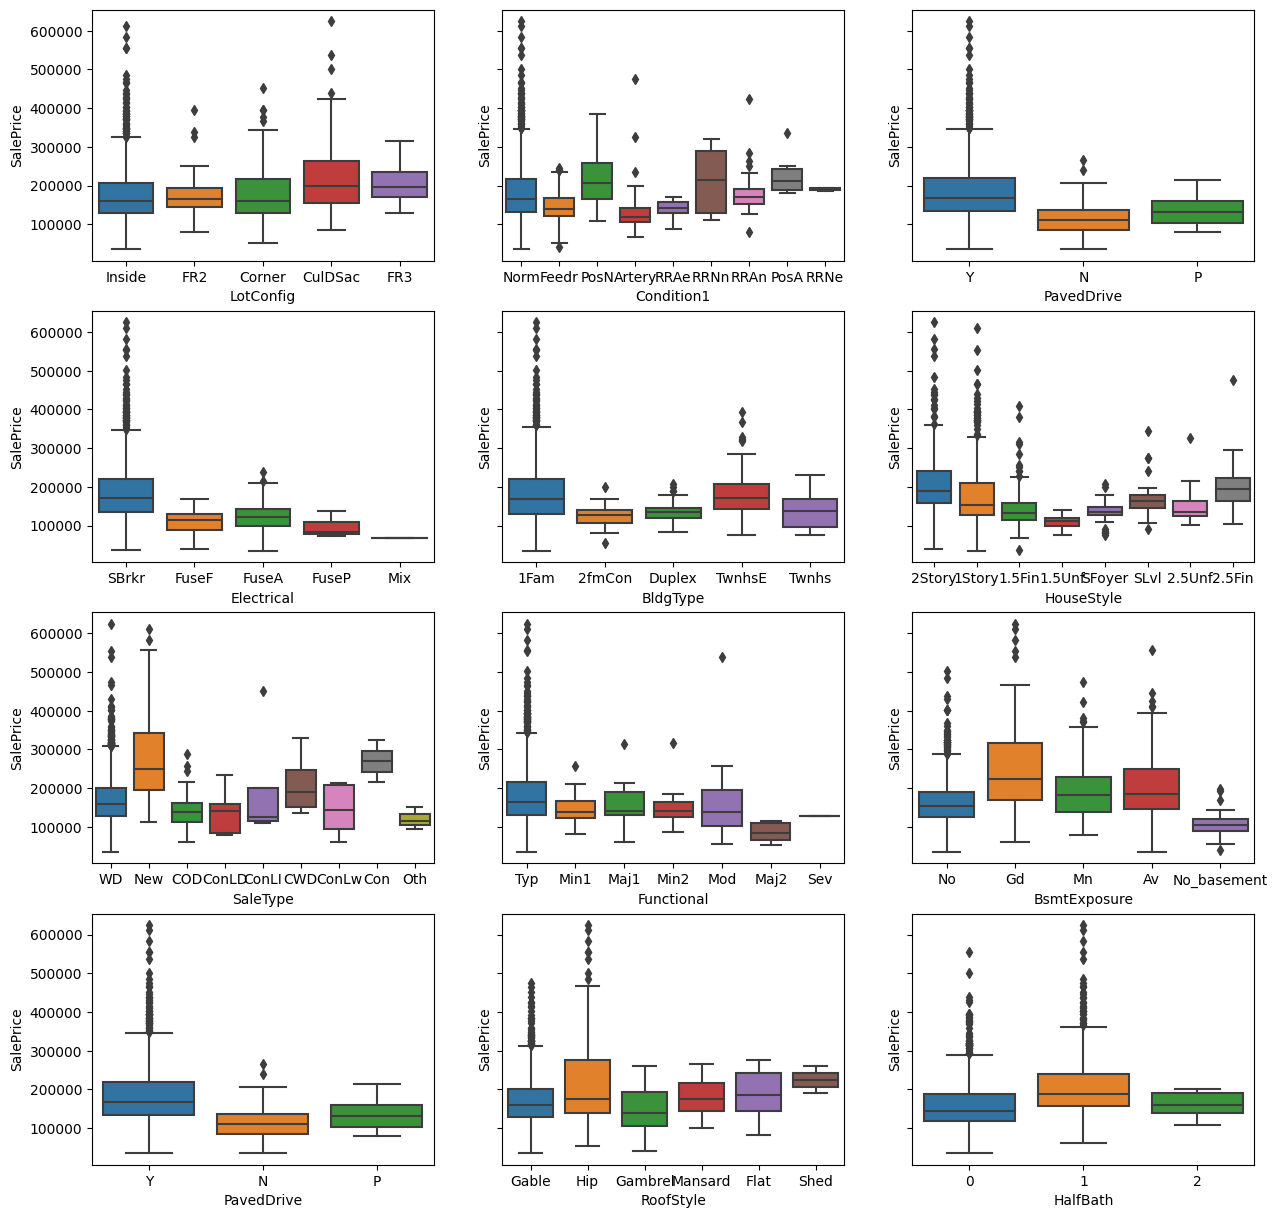

In [2531]:
fig, axes = plt.subplots(4, 3, figsize = (15, 15), sharey = True)
sns.boxplot(df, y = 'SalePrice', x = 'LotConfig', ax = axes[0,0])
sns.boxplot(df, y = 'SalePrice', x = 'Condition1', ax = axes[0,1])
sns.boxplot(df, y = 'SalePrice', x = 'PavedDrive', ax = axes[0,2])
sns.boxplot(df, y = 'SalePrice', x = 'Electrical', ax = axes[1,0])
sns.boxplot(df, y = 'SalePrice', x = 'BldgType', ax = axes[1,1])
sns.boxplot(df, y = 'SalePrice', x = 'HouseStyle', ax = axes[1,2])
sns.boxplot(df, y = 'SalePrice', x = 'SaleType', ax = axes[2,0])
sns.boxplot(df, y = 'SalePrice', x = 'Functional', ax = axes[2,1])
sns.boxplot(df, y = 'SalePrice', x = 'BsmtExposure', ax = axes[2,2])
sns.boxplot(df, y = 'SalePrice', x = 'PavedDrive', ax = axes[3,0])
sns.boxplot(df, y = 'SalePrice', x = 'RoofStyle', ax = axes[3,1])
sns.boxplot(df, y = 'SalePrice', x = 'HalfBath', ax = axes[3,2])

In [2532]:
# create Cul_de_sac dummy
def cul_de_sac_dummy(row):
  if row['LotConfig'] == 'CulDSac':
    return 1
  else:
    return 0

df['Cul_de_sac'] = df.apply(lambda row: cul_de_sac_dummy(row), axis = 1).astype('int8')

# create Positive feature dummy
def positive_feature_dummy(row):
  if (row['Condition1'] in ['PosN', 'PosA']) or (row['Condition2'] in ['PosN', 'PosA']):
    return 1
  else:
    return 0

df['Positive_feature'] = df.apply(lambda row: positive_feature_dummy(row), axis = 1).astype('int8')

# create Adjacent_main_road dummy
def adjacent_main_road_dummy(row):
  if (row['Condition1'] in ['Artery', 'Feedr', 'RRAe']) or \
     (row['Condition2'] in ['Artery', 'Feedr', 'RRAe']):
    return 1
  else:
    return 0

df['Adjacent_main_road'] = df.apply(lambda row: adjacent_main_road_dummy(row), axis = 1).astype('int8')

# create Fuse_electrical dummy
def fuse_electrical_dummy(row):
  if (row['Electrical'] in ['FuseA', 'FuseF', 'FuseP', 'Mix']):
    return 1
  else:
    return 0

df['Fuse_electrical'] = df.apply(lambda row: fuse_electrical_dummy(row), axis = 1).astype('int8')

# create Shared_walls dummy
def shared_walls_dummy(row):
  if (row['BldgType'] in ['2FmCon', 'Duplx', 'Twnhs']):
    return 1
  else:
    return 0

df['Shared_walls'] = df.apply(lambda row: shared_walls_dummy(row), axis = 1).astype('int8')

# create Unfinish dummy
def unfinish_dummy(row):
  if (row['HouseStyle'] in ['1.5Unf', '2.5Unf']):
    return 1
  else:
    return 0

df['Unfinish'] = df.apply(lambda row: unfinish_dummy(row), axis = 1).astype('int8')

# create New dummy
def new_dummy(row):
  if (row['SaleType'] == 'New'):
    return 1
  else:
    return 0

df['New'] = df.apply(lambda row: new_dummy(row), axis = 1).astype('int8')

# create Deduction dummy
def deduction_dummy(row):
  if (row['Functional'] == 'Typ'):
    return 0
  else:
    return 1

df['Deduction'] = df.apply(lambda row: deduction_dummy(row), axis = 1).astype('int8')

# create Good_basement_exposure dummy
def basement_exposure_dummy(row):
  if (row['BsmtExposure'] == 'Gd'):
    return 1
  else:
    return 0

df['Good_basement_exposure'] = df.apply(lambda row: basement_exposure_dummy(row),
                                        axis = 1).astype('int8')

# create Driveway_paved dummy
def driveway_paved_dummy(row):
  if (row['PavedDrive'] == 'Y'):
    return 1
  else:
    return 0

df['Driveway_paved'] = df.apply(lambda row: driveway_paved_dummy(row),
                                        axis = 1).astype('int8')

# create Street_paved dummy
def street_dummy(row):
  if (row['Street'] == 'Pave'):
    return 1
  else:
    return 0

df['Street_paved'] = df.apply(lambda row: street_dummy(row), axis = 1).astype('int8')

# create Has_halfbath dummy
def halfbath_dummy(row):
  if row['HalfBath'] > 0:
    return 1
  else:
    return 0

df['Has_halfbath'] = df.apply(lambda row: halfbath_dummy(row), axis = 1).astype('int8')

# create Hip_roof dummy
def hiproof_dummy(row):
  if row['RoofStyle'] == 'Hip':
    return 1
  else:
    return 0

df['Hip_roof'] = df.apply(lambda row: hiproof_dummy(row), axis = 1).astype('int8')

# encode CentralAir as numerical
def air_numerical(row):
  if (row['CentralAir'] == 'Y'):
    return 1
  else:
    return 0

df['CentralAir'] = df.apply(lambda row: air_numerical(row), axis = 1).astype('int8')

### Numerical variables

The 2000's house price bubble peaked around 2006-2007 while prices started to decline following the outburst of the crisis in 2008. Our data shows that houses with $YrSold < 2008$ have a higher $SalePrice$ than houses with $YrSold \geq 2008$. A dummy variable can be created to capture this.

In [2533]:
df_train.groupby('YrSold')['SalePrice'].mean()

YrSold
2006    182549.458599
2007    181947.614198
2008    177247.500000
2009    178851.783383
2010    177393.674286
Name: SalePrice, dtype: float64

In [2534]:
def one_hot_year(row):
  if row['YrSold'] >= 2008:
    return 1
  else:
    return 0
df['GFC'] = df.apply(lambda row: one_hot_year(row), axis = 1).astype('int8')

A variable called $Age$ that describes the age of the house at the moment of sale can be created as $Age = YrSold - YearBuilt$. As expected, older houses tend to have a lower sale price than newer ones. Moreover, whether the house has been renovated or not appears to also have an effect on $SalePrice$ with renovated houses showing a higher sale price than non-renovated ones for a given age. The dummy variable $Remodel$ is created to capture the interaction effect.

<Axes: xlabel='Age', ylabel='SalePrice'>

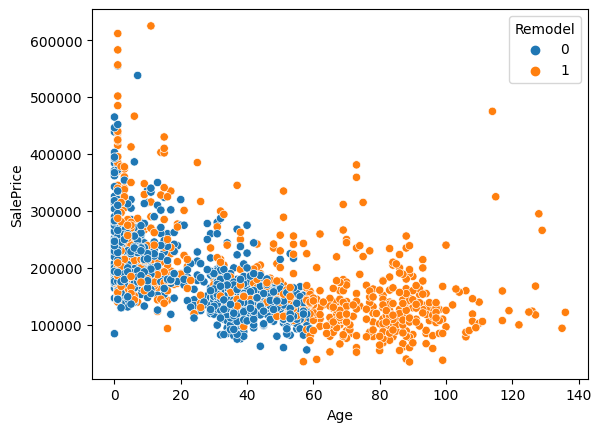

In [2535]:
df['Age'] = df['YrSold'] - df['YearBuilt']

def label_remodel (row):
  if row['YearBuilt'] < row['YearRemodAdd'] :
    return 1
  else:
    return 0
df['Remodel'] = df.apply(lambda row: label_remodel(row), axis=1).astype('int8')
sns.scatterplot(df, x='Age', y='SalePrice', hue='Remodel')

The total area of the house can be obtained as $HouseArea = 1stFlrSF + 2ndFlrSF + TotalBsmtSF$. Moreover, dummies can be created to describe whether the house has basement/2nd floor.

<Axes: xlabel='HouseArea', ylabel='SalePrice'>

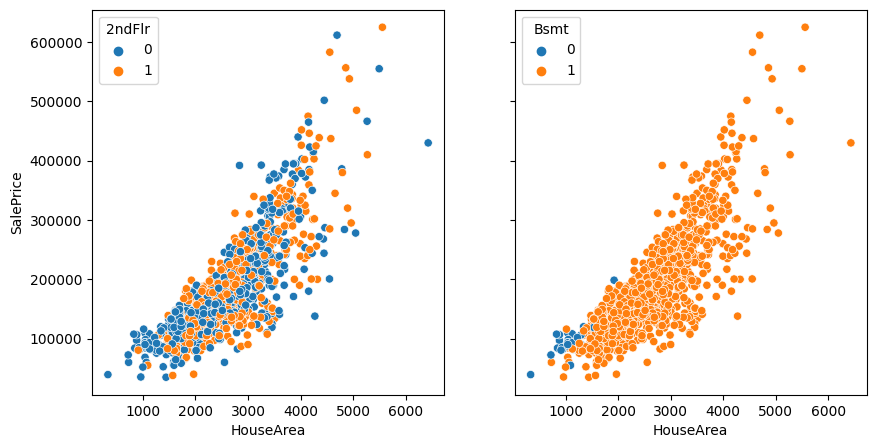

In [2536]:
df['HouseArea'] = df['2ndFlrSF'] + df['TotalBsmtSF'] + df['1stFlrSF']
df['2ndFlr'] = pd.cut(df['2ndFlrSF'], bins = [-float('inf'), 0, float('inf')],
                      labels = [0, 1]).astype('int8')
df['Bsmt'] = pd.cut(df['TotalBsmtSF'], bins = [-float('inf'), 0, float('inf')],
                                  labels = [0, 1]).astype('int8')

fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey = True)
sns.scatterplot(df, x='HouseArea', y='SalePrice', hue='2ndFlr', ax = axes[0])
sns.scatterplot(df, x='HouseArea', y='SalePrice', hue='Bsmt', ax = axes[1])


The variable $PoolArea$ does not provide much information as a numerical variable as most houses has no pool (pool area = 0). Again, a dummy can be created to describe whether the house has pool or not.

<Axes: xlabel='Pool', ylabel='SalePrice'>

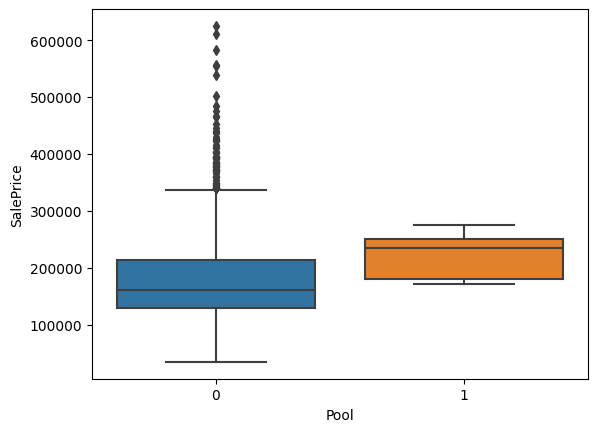

In [2537]:
df['Pool'] = pd.cut(df['PoolArea'], bins = [-float('inf'), 0, float('inf')],
                                  labels = [0, 1]).astype('int8')
sns.boxplot(df, x = 'Pool', y = 'SalePrice')

Bigger houses are more likely to have more fireplaces. Thus, the variable $Fireplaces$ and $HouseArea$ are likely to be highly correlated. Instead, a dummy can be created that describes whether the house has at least one fireplace or not.

<Axes: xlabel='HouseArea', ylabel='SalePrice'>

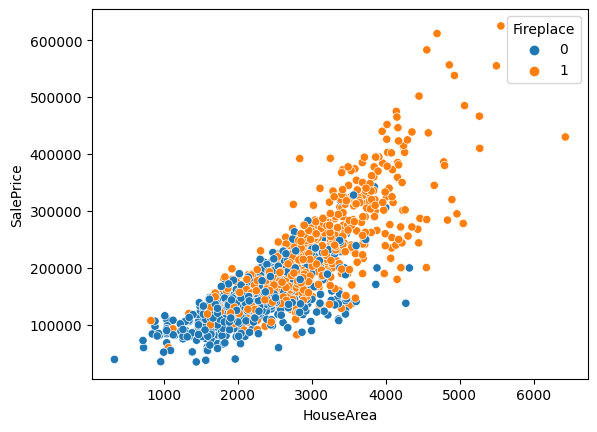

In [2538]:
df['Fireplace'] = pd.cut(df['Fireplaces'], bins = [-float('inf'), 0, float('inf')],
                                  labels = [0, 1]).astype('int8')
sns.scatterplot(df, x = 'HouseArea', y = 'SalePrice', hue = 'Fireplace')

In [2539]:
# brings 'SalePrice' to the latest column position
columns_order = [col for col in df.columns if col != 'SalePrice'] + ['SalePrice']
df = df[columns_order]

## Feature selection

To mitigate multicollinearity, highly correlated groups of variables are pruned, retaining only one representative variable from each group.

| Variable/s dropped | Variable remaining |
|:------------------:|:--------:|
|LotFrontage|LotArea|
|YearBuilt, GarageYrBlt|Age|
|YearRemodAdd|Age and dummy Remodel|
|TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, <br> BedroomAbvGr, TotRmsAbvGrd|HouseArea|
|GarageArea|GarageCars|



<Axes: >

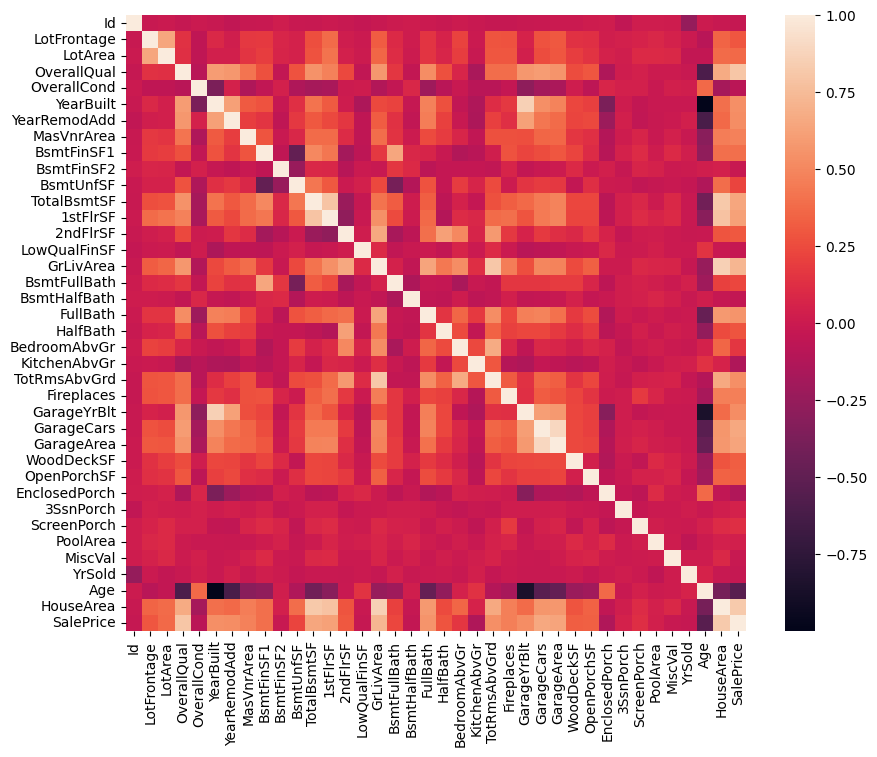

In [2540]:
correlation_matrix = df.select_dtypes(exclude = 'int8').corr()

plt.subplots(figsize = (10, 8))
sns.heatmap(correlation_matrix, vmax = 1)

Additionally, the following variables will not be considered for the modelling part for the reasons specified in the table:

|Reason|Variable/s dropped|
|:------------------:|:--------:|
|Too many levels some with little observations|MSSubClass|
|Related with another variable (in parenthesis)|Alley (Street); BsmtQual (OveralQual); <br> BsmtCond (Poor_condition); ExterQual (OverallQual); <br> ExterCond (Poor_condition); BsmtFinType1 & BsmtFinType2 (OverallQual); <br> Heating (HeatingQC); GarageQual (OverallQual); GarageCond (Poor_condition); <br> FireplaceQu (OverallQual); LandContour (Location)|
|Lack/weak economic significance|LotShape, LandSlope, RoofStyle, RoofMatl Exterior1st, Exterior2nd, <br> MasVnrType, Foundation, BedroomAbvGr, KitchenAbvGr, WoodDeckSF, <br> OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Fence, <br> MiscFeature, MiscVal, GarageFinish, BsmtFullBath, BsmtHalfBath, <br> MasVnrArea, BsmtFinSF1, BsmtFinSF2|
|Too little variability|Utilities, Electrical, PoolQC|
|Dummy created (in parenthesis)|LotConfig (Cul_de_sac); Neighborhood (Location); <br> Condition1 & Condition2 (Positive_feature & Adjacent_main_road); <br> BldgType (Shared_walls); HouseStyle (Unfinish); <br> OverallCond (Poor_condition); Electrical (Fuse_electrical); <br> Functional (Deduction); PoolArea (Pool); MoSold (Winter); YrSold (GFC); <br> SaleType & SaleCondition (New); Street (Street_paved); <br>PavedDrive (Driveway_paved); Fireplaces (Fireplace)|

Keep only the variables that will be used in the analysis. Quadratic terms for $LotArea$, $Age$ and $HouseArea$ are generated since from the scatterplots the relationship with $SalePrice$ seem non-linear.  

In [2541]:
df = df[['SalePrice', 'Id', 'MSZoning', 'LotArea', 'Cul_de_sac',
         'Location', 'Positive_feature', 'Adjacent_main_road', 'Shared_walls',
         'Unfinish', 'OverallQual', 'Poor_condition', 'Age', 'Remodel',
         'HeatingQC', 'Winter', 'CentralAir', 'Fuse_electrical', 'Has_halfbath',
         'HouseArea', 'FullBath', 'KitchenQual', 'Fireplace', 'GarageType',
         'GarageCars', 'Deduction', 'Driveway_paved', 'Pool', 'GFC', 'New',
         '2ndFlr', 'Bsmt', 'Good_basement_exposure', 'Street_paved', 'Hip_roof']]

df['LotArea_2'] = df['LotArea']**2
df['Age_2'] = df['Age']**2
df['HouseArea_2'] = df['HouseArea']**2

<Axes: xlabel='HouseArea', ylabel='SalePrice'>

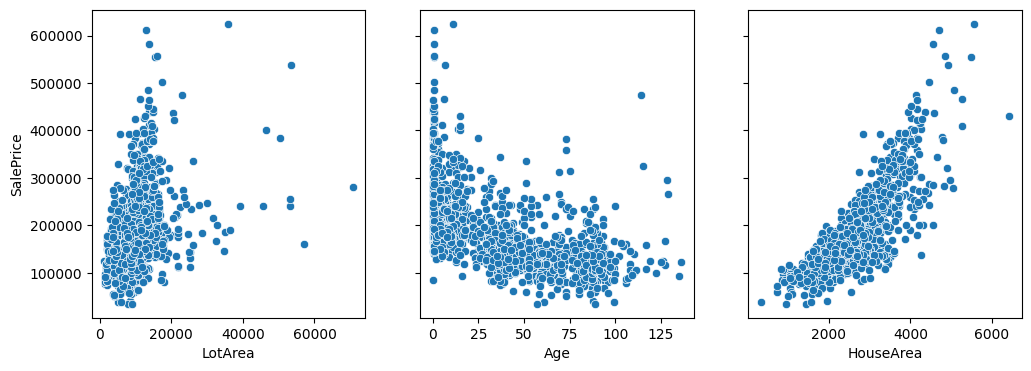

In [2542]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4), sharey = True)
sns.scatterplot(df, y = 'SalePrice', x = 'LotArea', ax = axes[0])
sns.scatterplot(df, y = 'SalePrice', x = 'Age', ax = axes[1])
sns.scatterplot(df, y = 'SalePrice', x = 'HouseArea', ax = axes[2])

Get dummies from categorical variables

In [2543]:
df = pd.get_dummies(df)
df.columns

Index(['SalePrice', 'Id', 'LotArea', 'Cul_de_sac', 'Positive_feature',
       'Adjacent_main_road', 'Shared_walls', 'Unfinish', 'OverallQual',
       'Poor_condition', 'Age', 'Remodel', 'HeatingQC', 'Winter', 'CentralAir',
       'Fuse_electrical', 'Has_halfbath', 'HouseArea', 'FullBath',
       'KitchenQual', 'Fireplace', 'GarageCars', 'Deduction', 'Driveway_paved',
       'Pool', 'GFC', 'New', '2ndFlr', 'Bsmt', 'Good_basement_exposure',
       'Street_paved', 'Hip_roof', 'LotArea_2', 'Age_2', 'HouseArea_2',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Location_bad', 'Location_fair', 'Location_good',
       'Location_excellent', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_No_garage'],
      dtype='object')

To avoid perfect multicollinearity, drop $MSZoning\_RL$, $Location\_bad$ and $GarageType\_No\_garage$. Also, generate interaction terms.

In [2544]:
df = df.drop(['MSZoning_RL', 'Location_bad', 'GarageType_No_garage'], axis = 1)

# interaction terms
df['Winter_HeatingQC'] = df['Winter']*df['HeatingQC']
df['Remodel_Age'] = df['Remodel']*df['Age']
df['Good_basement_exposure_Bsmt'] = df['Good_basement_exposure']*df['Bsmt']

df_train = df.iloc[0:df_train.shape[0]]
df_test = df.iloc[df_train.shape[0]:]

df_train.shape

(1452, 51)

# Regression analysis

Even after feature selection, it is possible that some of the features chosen are not significant or are correlated with other features in the model. This can lead to multicollinearity, which can degrade the performance of the model. Lasso regression can be used to address this issue by shrinking the coefficients of less important variables towards 0. This can help to improve the model's fit and reduce the impact of multicollinearity.

The training dataset is randomly split into train-validation set and holdout (test) set. Additionally, $SalePrice$ is expressed in logarithms since the model is evaluated on the RMSE between the logarithm of the predicted value and the logarithm of the observed sales price.

In [2545]:
X = df_train.drop(['SalePrice', 'Id'], axis = 1)
Y = np.log(df_train['SalePrice'])

train_valid_X, test_X, train_valid_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Before fitting the model, it is necessary to standardise the regressors.

In [2546]:
scaler = StandardScaler()
train_valid_X = pd.DataFrame(scaler.fit_transform(train_valid_X),
                             columns = train_valid_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns = test_X.columns)

Five-fold cross validation is used to fine-tune the Lasso regularisation parameter. The similar performance in the train-validation and holdout (test) sets suggest that the model has a good generalisation.

In [2547]:
lr_lasso = Lasso()
param_grid = {
    'alpha': np.logspace(-6, -2, 100)
}

lr_lasso = GridSearchCV(lr_lasso, param_grid, scoring='neg_root_mean_squared_error', cv=5)
lr_lasso.fit(train_valid_X, train_valid_Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 1.09749877e-06, 1.20450354e-06, 1.32194115e-06,
       1.45082878e-06, 1.59228279e-06, 1.74752840e-06, 1.91791026e-06,
       2.10490414e-06, 2.31012970e-06, 2.53536449e-06, 2.78255940e-06,
       3.05385551e-06, 3.35160265e-06, 3.67837977e-06, 4.03701726e-06,
       4.43062146e-06, 4.86260158e-06, 5.33669923e-06, 5....
       1.17681195e-03, 1.29154967e-03, 1.41747416e-03, 1.55567614e-03,
       1.70735265e-03, 1.87381742e-03, 2.05651231e-03, 2.25701972e-03,
       2.47707636e-03, 2.71858824e-03, 2.98364724e-03, 3.27454916e-03,
       3.59381366e-03, 3.94420606e-03, 4.32876128e-03, 4.75081016e-03,
       5.21400829e-03, 5.72236766e-03, 6.28029144e-03, 6.89261210e-03,
       7.56463328e-03, 8.30217568e-03, 9.11162756e-03, 1.00000000e-02])},
             scoring='neg_root_mean_squared_error')

In [2548]:
print("Best Lasso regularisation parameter value:", lr_lasso.best_estimator_)
print("Training score (RMSE):", - lr_lasso.score(train_valid_X, train_valid_Y))
print("Test score (RMSE):", - lr_lasso.score(test_X, test_Y))

Best Lasso regularisation parameter value: Lasso(alpha=0.0001668100537200059)
Training score (RMSE): 0.12095016768534737
Test score (RMSE): 0.12320123409308845


Compare performance against a linear regression without regularisation.

In [2549]:
lr = LinearRegression(fit_intercept = True)
lr.fit(train_valid_X, train_valid_Y)

LinearRegression()

Performance almost identical to that of linear regression with Lasso penalty. On average, the predicted sale price deviates slightly below $25.000 from the true price.

In [2550]:
print("Training score (coefficient of determination):", lr.score(train_valid_X, train_valid_Y))
print("Training score (RMSE):", mean_squared_error(train_valid_Y, lr.predict(train_valid_X))**0.5)
print("Test score (coefficient of determination):", lr.score(test_X, test_Y))
print("Test score (RMSE):", mean_squared_error(test_Y, lr.predict(test_X))**0.5)

Training score (coefficient of determination): 0.903347970193685
Training score (RMSE): 0.12091231129163446
Test score (coefficient of determination): 0.913721610173884
Test score (RMSE): 0.12326125054799177


## Robustness checks

The residuals exhibit a left-skewed and leptokurtic distribution. Additionally, both the residuals vs. fitted value plot and the Q-Q plot indicate the existence of outliers. Nevertheless, despite these observations, the overall fit appears reasonably good and demonstrates strong performance.

Text(0.5, 1.0, 'Distribution of residuals - Holdout (test) data')

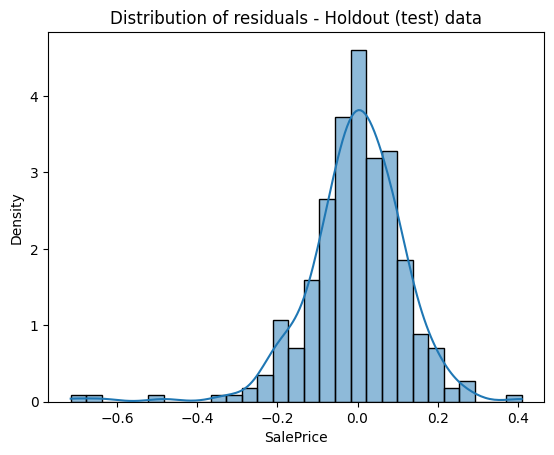

In [2551]:
y_hat = lr.predict(test_X)
test_residuals = test_Y - y_hat

sns.histplot(test_residuals, stat = 'density', kde = True)
plt.title("Distribution of residuals - Holdout (test) data")

Text(0.5, 1.0, 'Residuals (x-axis) vs fitted values (y-axis) - Holdout (test) data')

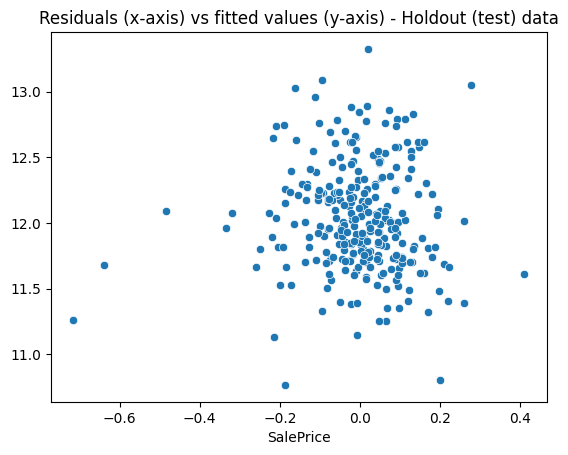

In [2552]:
sns.scatterplot(x = test_residuals, y = y_hat)
plt.title("Residuals (x-axis) vs fitted values (y-axis) - Holdout (test) data")

Text(0.5, 1.0, 'Quantile-Quantile Plot - Holdout (test) data')

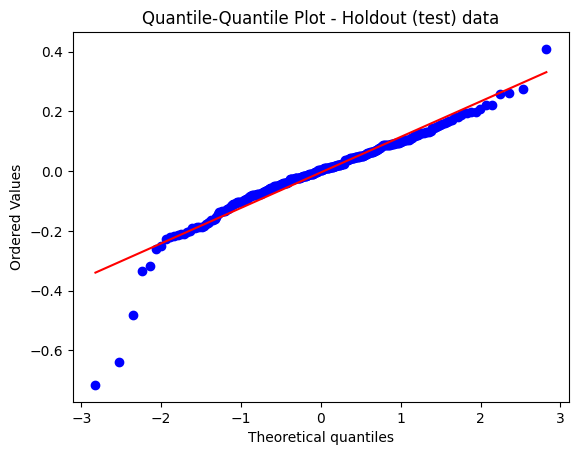

In [2553]:
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot - Holdout (test) data")

## Conclusions

Looking at the table with the coefficient estimates for the linear regression with and without Lasso constraint we can extract two conclusions: First, the most important variables are $LotArea$, $OverallQual$, $KitchenQual$, $GarageCars$, $New$, $HouseArea$ (through quadratic term) and $Location$. We can claim this because variables have been standardised and thus are measured in the same scale. However, interpretation of coefficients when variables have been standardised is not that straightforward especially for dummy variables. Second, from comparing the coefficients it becomes clear the importance of including a regularization constraint in the optimization problem. For example, the coefficient for $Positive\_feature$ is negative, which would suggest that having a positive feature close to a house is associated with a lower sale price. This result is likely due to multicollinearity. However, when using Lasso regularization, the coefficient for Positive_feature becomes zero.

In [2554]:
estimates = pd.DataFrame({'Regressor': lr.feature_names_in_, 'Coefficient_lr': lr.coef_,
                          'Coefficient_lasso': lr_lasso.best_estimator_.coef_})
estimates.head(60)

,Regressor,Coefficient_lr,Coefficient_lasso
0,LotArea,0.049741,0.047601
1,Cul_de_sac,0.008431,0.008347
2,Positive_feature,-0.000554,-0.000364
3,Adjacent_main_road,-0.020215,-0.019932
4,Shared_walls,-0.009390,-0.009571
5,Unfinish,0.000059,0.000000
6,OverallQual,0.075085,0.075474
7,Poor_condition,-0.031470,-0.031505
8,Age,-0.004335,-0.003829
9,Remodel,0.001681,0.002571


## Submission

Train model with Lasso constraint over entire training data. Then, predict sale price using observations from test set.

In [2555]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),
                             columns = X.columns)

lr_lasso.fit(X, Y)

X_test = pd.DataFrame(scaler.transform(df_test.drop(['SalePrice', 'Id'], axis = 1)),
                      columns = df_test.drop(['SalePrice', 'Id'], axis = 1).columns)

predictions = np.exp(lr_lasso.predict(X_test))

submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions})

submission.to_csv("submission.csv", index = False)